In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
df=pd.read_csv('F:\\train_8wry4cB.csv')
test=pd.read_csv('F:\\test_Yix80N0.csv')

In [212]:
df.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [213]:
test.head()

,session_id,startTime,endTime,ProductList
0,u12112,08/12/14 13:36,08/12/14 13:36,A00002/B00003/C00006/D19956/
1,u19725,19/12/14 13:52,19/12/14 13:52,A00002/B00005/C00067/D02026/
2,u11795,01/12/14 10:44,01/12/14 10:44,A00002/B00002/C00004/D12538/
3,u22639,08/12/14 20:19,08/12/14 20:22,A00002/B00003/C00079/D22781/;A00002/B00003/C00...
4,u18034,15/12/14 19:33,15/12/14 19:33,A00002/B00001/C00010/D23419/


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 5 columns):
session_id     10500 non-null object
startTime      10500 non-null object
endTime        10500 non-null object
ProductList    10500 non-null object
gender         10500 non-null object
dtypes: object(5)
memory usage: 410.3+ KB


In [215]:
df['gender'].value_counts()

female    8192
male      2308
Name: gender, dtype: int64

In [216]:
df.isnull().sum()

session_id     0
startTime      0
endTime        0
ProductList    0
gender         0
dtype: int64

In [217]:
df['ProductList'][0]

'A00002/B00003/C00006/D28435/;A00002/B00003/C00006/D02554/;A00002/B00003/C00006/D28436/;A00002/B00003/C00006/D28437/'

In [218]:
df['ProductList'][1]

'A00001/B00009/C00031/D29404/;A00001/B00009/C00031/D02617/;A00001/B00009/C00031/D29407/;A00001/B00009/C00031/D29410/;A00001/B00009/C00031/D29411/;A00001/B00009/C00031/D25444/;A00001/B00009/C00031/D29418/'

In [219]:
ids=test['session_id']

In [220]:
df=df.drop(['session_id'],1)
test=test.drop(['session_id'],1)

In [221]:
df['ProductList']=df['ProductList'].str.replace('/;',' ')
test['ProductList']=test['ProductList'].str.replace('/;',' ')

In [222]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english',max_features=100,ngram_range=(2, 2))
tf.fit(df['ProductList'])
df_tf=pd.DataFrame(tf.transform(df['ProductList']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf_')
df=df.join(df_tf)
df=df.drop('ProductList',1)

In [223]:
test_tf=pd.DataFrame(tf.transform(test['ProductList']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf_')
test=test.join(test_tf)
test=test.drop('ProductList',1)

In [224]:
df.head()

,startTime,endTime,gender,tfidf_a00001 b00001,tfidf_a00001 b00004,tfidf_a00001 b00009,tfidf_a00001 b00015,tfidf_a00001 b00027,tfidf_a00001 b00031,tfidf_a00001 b00037,...,tfidf_b00017 c00152,tfidf_b00020 c00052,tfidf_b00021 c00055,tfidf_b00021 c00064,tfidf_b00022 c00028,tfidf_b00022 c00036,tfidf_b00022 c00048,tfidf_b00027 c00082,tfidf_b00031 c00044,tfidf_b00031 c00091
0,15/12/14 18:11,15/12/14 18:12,female,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16/12/14 14:35,16/12/14 14:41,male,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01/12/14 15:58,01/12/14 15:58,female,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23/11/14 2:57,23/11/14 3:00,female,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17/12/14 16:44,17/12/14 16:46,male,0.538357,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [225]:
df['startTime']=pd.to_datetime(df['startTime'])
df['endTime']=pd.to_datetime(df['endTime'])

In [226]:
test['startTime']=pd.to_datetime(test['startTime'])
test['endTime']=pd.to_datetime(test['endTime'])

In [227]:
df['day']=df['startTime'].dt.day
df['month']=df['startTime'].dt.month
df['year']=df['startTime'].dt.year
df['hour']=df['startTime'].dt.hour
df['minute']=df['startTime'].dt.minute
df['weekofyear']=df['startTime'].dt.weekofyear
df['week']=df['startTime'].dt.week
df['quarter']=df['startTime'].dt.quarter

In [228]:
df['day_end']=df['endTime'].dt.day
df['month_end']=df['endTime'].dt.month
df['year_end']=df['endTime'].dt.year
df['hour_end']=df['endTime'].dt.hour
df['minute_end']=df['endTime'].dt.minute
df['weekofyear_end']=df['endTime'].dt.weekofyear
df['week_end']=df['endTime'].dt.week
df['quarter_end']=df['startTime'].dt.quarter

In [229]:
test['day']=test['startTime'].dt.day
test['month']=test['startTime'].dt.month
test['year']=test['startTime'].dt.year
test['hour']=test['startTime'].dt.hour
test['minute']=test['startTime'].dt.minute
test['weekofyear']=test['startTime'].dt.weekofyear
test['week']=test['startTime'].dt.week
test['quarter']=test['startTime'].dt.quarter

In [230]:
test['day_end']=test['endTime'].dt.day
test['month_end']=test['endTime'].dt.month
test['year_end']=test['endTime'].dt.year
test['hour_end']=test['endTime'].dt.hour
test['minute_end']=test['endTime'].dt.minute
test['weekofyear_end']=test['endTime'].dt.weekofyear
test['week_end']=test['endTime'].dt.week
test['quarter_end']=test['startTime'].dt.quarter

In [231]:
df=df.drop(['startTime','endTime'],1)
test=test.drop(['endTime','startTime'],1)

In [232]:
df.head()

,gender,tfidf_a00001 b00001,tfidf_a00001 b00004,tfidf_a00001 b00009,tfidf_a00001 b00015,tfidf_a00001 b00027,tfidf_a00001 b00031,tfidf_a00001 b00037,tfidf_a00002 b00001,tfidf_a00002 b00002,...,week,quarter,day_end,month_end,year_end,hour_end,minute_end,weekofyear_end,week_end,quarter_end
0,female,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,51,4,15,12,2014,18,12,51,51,4
1,male,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,51,4,16,12,2014,14,41,51,51,4
2,female,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.528136,0.0,...,2,1,12,1,2014,15,58,2,2,1
3,female,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,47,4,23,11,2014,3,0,47,47,4
4,male,0.538357,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,51,4,17,12,2014,16,46,51,51,4


In [233]:
df.shape

(10500, 117)

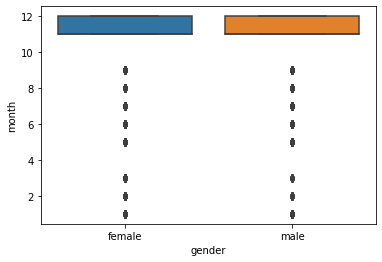

In [234]:
sns.boxplot(x=df['gender'],y=df['month'])

In [235]:
test.shape

(4500, 116)

In [236]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['gender'])
df['gender']=le.transform(df['gender'])

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

In [238]:
x=df.drop('gender',1)
y=df['gender']

In [239]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
sd.fit(x)
x=sd.transform(x)
test=sd.transform(test)

In [240]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [241]:
from sklearn.ensemble import RandomForestClassifier
rb=RandomForestClassifier(n_estimators=200)
rb.fit(x_train,y_train)
rb.score(x_test,y_test)

0.8739047619047619

In [242]:
from lightgbm import LGBMClassifier
lg=LGBMClassifier(n_estimators=300,subsample=0.9,colsample_bytree=0.9,learning_rate=0.2)
lg.fit(x_train,y_train)
lg.score(x_test,y_test)

0.8586666666666667

In [243]:
from xgboost import XGBClassifier
clf= XGBClassifier(n_estimators=150,max_depth=9,subsample=0.7,colsample_bytree=0.7,learning_rate=0.3)
clf.fit(x,y)
clf.score(x_test,y_test)

0.9607619047619048

In [244]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=100,subsample=0.8)
gb.fit(x_train,y_train)
gb.score(x_test,y_test)

0.8769523809523809

In [245]:
dt=DecisionTreeClassifier(max_depth=7)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.8647619047619047

In [246]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier()
bag.fit(x_train,y_train)
bag.score(x_test,y_test)

0.8586666666666667

In [247]:
y_test=clf.predict(test)
y_test=le.inverse_transform(y_test)

In [248]:
sub=pd.read_csv('F:\\sample_submission_opxHi4g.csv')

In [249]:
sub.shape

(4500, 2)

In [250]:
sub['gender']=y_test

In [251]:
sub['gender'].value_counts()

female    3757
male       743
Name: gender, dtype: int64

In [252]:
sub.to_csv('F:\\answer.csv',index=False)

In [253]:
sub.head()

,session_id,gender
0,u12112,female
1,u19725,female
2,u11795,female
3,u22639,male
4,u18034,female
